In [1]:
#Imports for use in 
from typing import List, Dict, Tuple, Callable, Union
import os
import gc
import traceback
import warnings
from pdb import set_trace
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_squared_error as mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Mathew Shimko, Student ID: 801273652

In [2]:
#Import Dataset:
dfGameSales = pd.read_csv("video_games_sales.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
           genre  global_sales
0         Action       1751.18
1      Adventure        239.04
2       Fighting        448.91
3           Misc        809.96
4       Platform        831.37
5         Puzzle        244.95
6         Racing        732.04
7   Role-Playing      

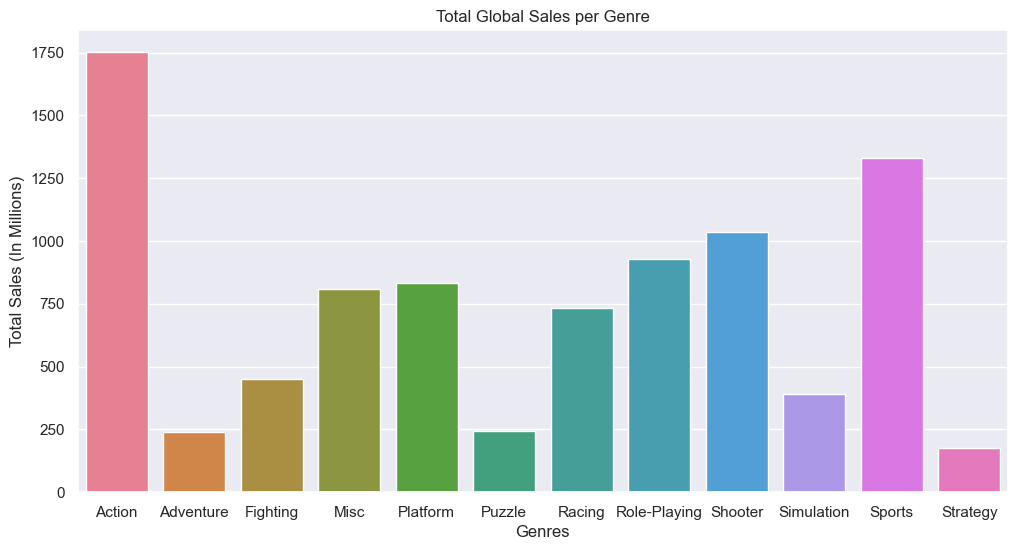

In [3]:
#Data Exploration of Dataset
dfGameSales.info()
#print(dfGameSales)

gTotalSales = dfGameSales.groupby("genre")["global_sales"].sum().reset_index()
print(gTotalSales)
sns.set(rc={'figure.figsize':(12, 6)})
SalesPlot = sns.barplot(data = gTotalSales, x='genre', y='global_sales',hue="genre",gap = 2)
plt.title("Total Global Sales per Genre")
plt.xlabel("Genres")
plt.ylabel("Total Sales (In Millions)")
print(dfGameSales['na_sales'])
plt.show()

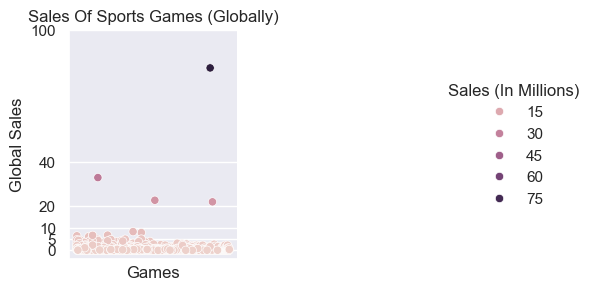

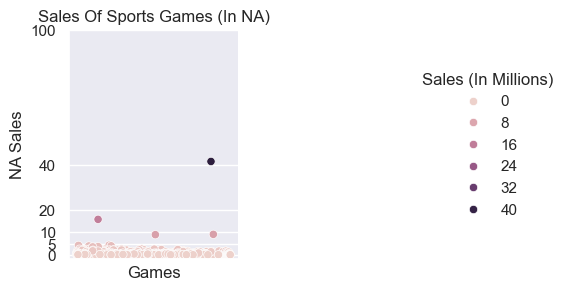

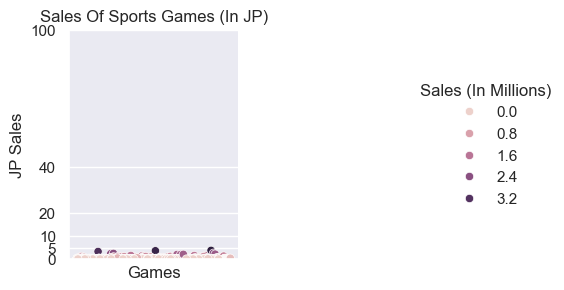

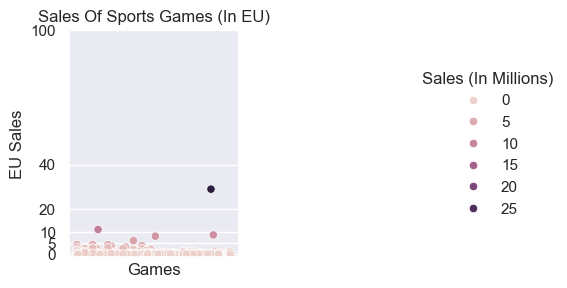

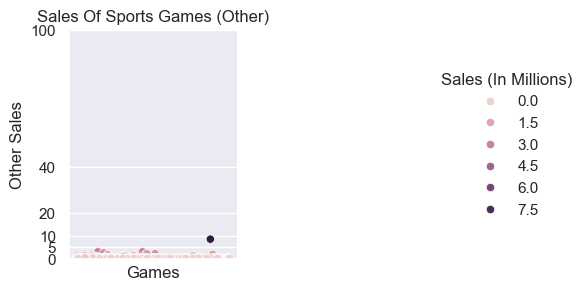

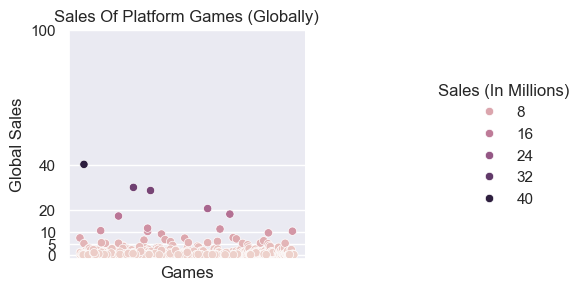

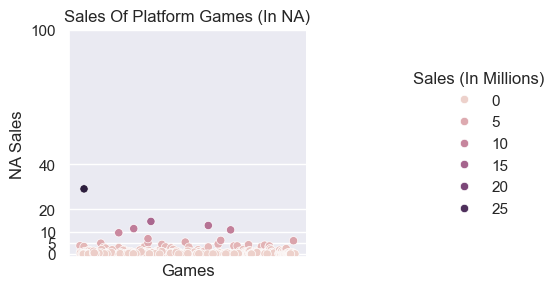

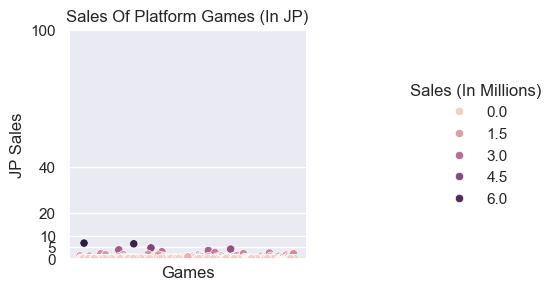

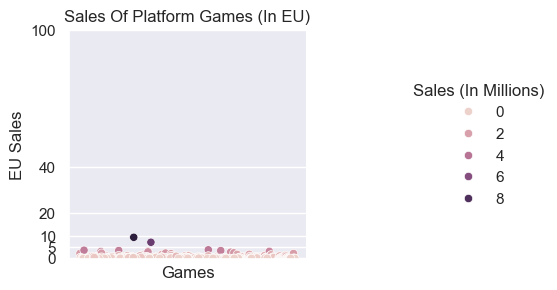

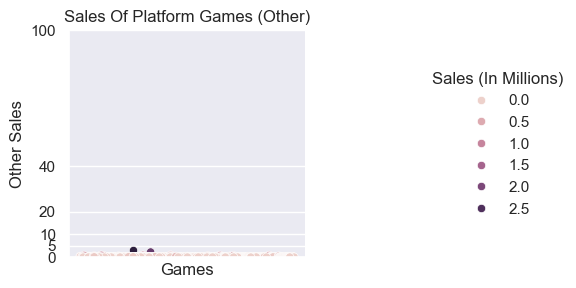

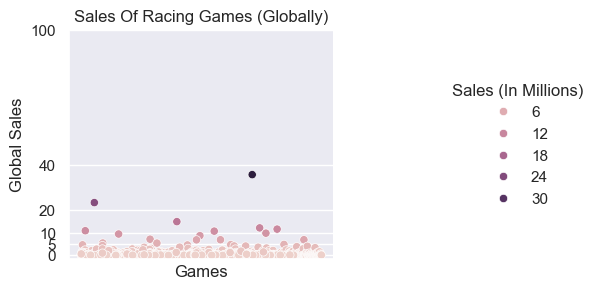

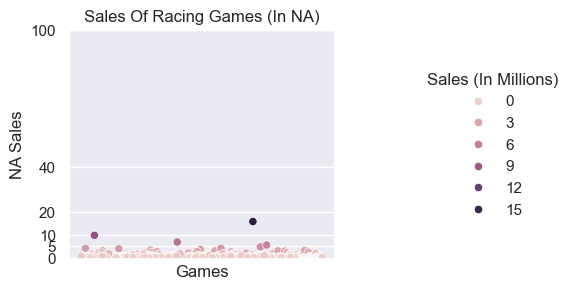

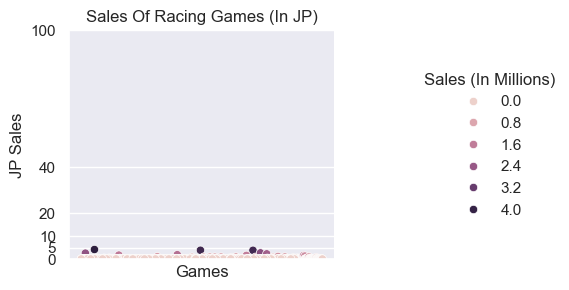

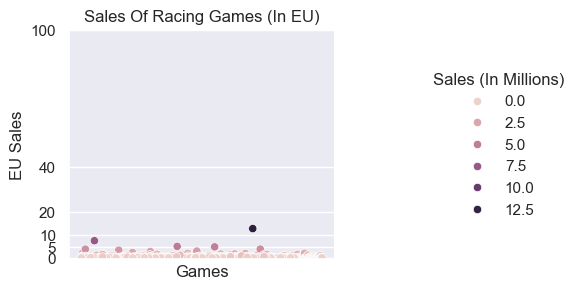

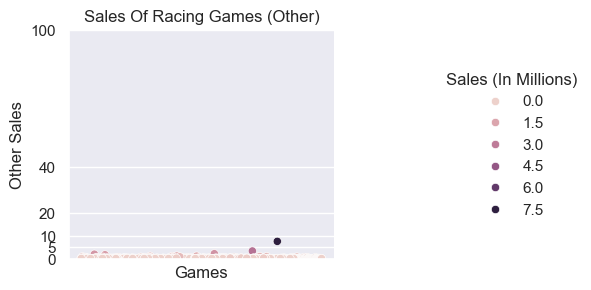

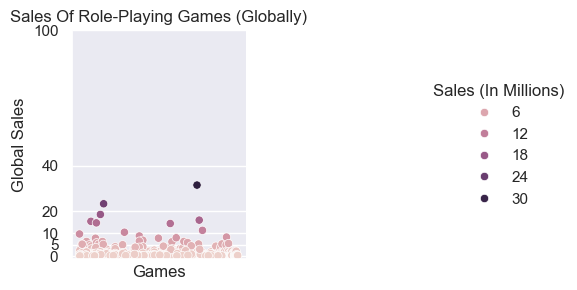

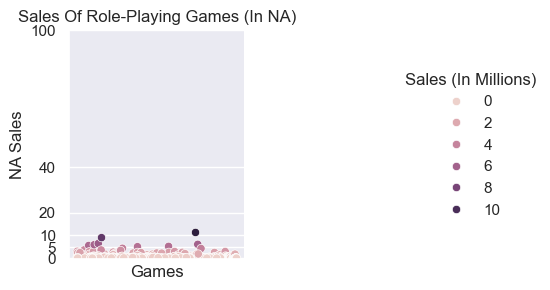

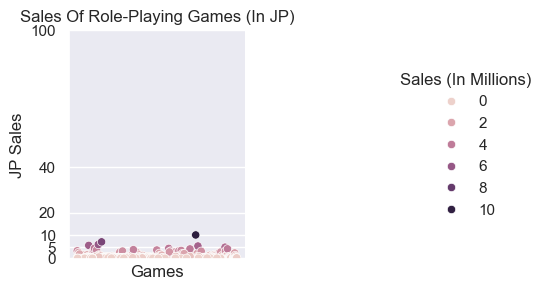

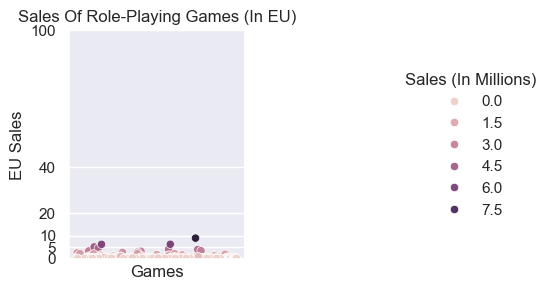

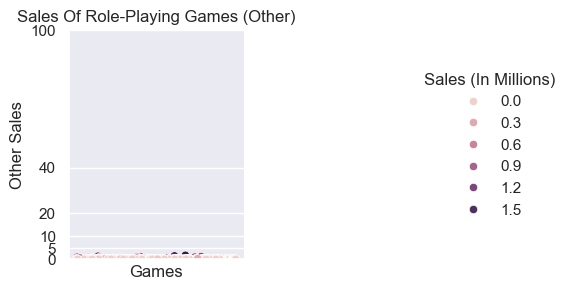

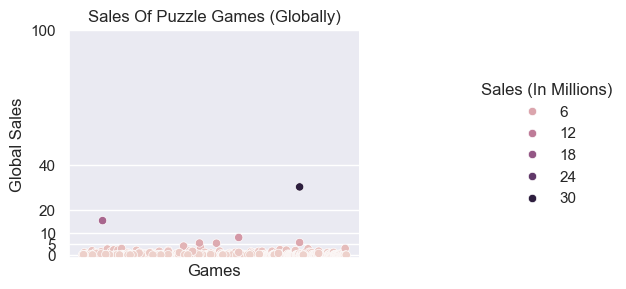

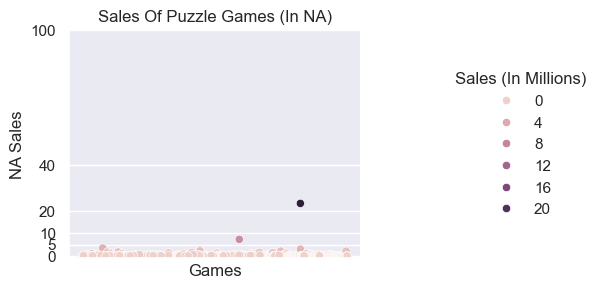

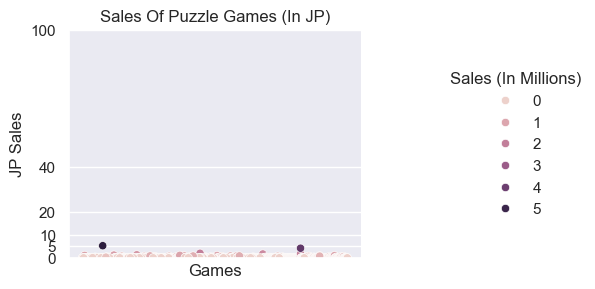

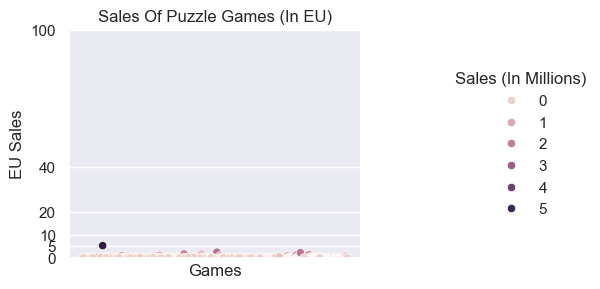

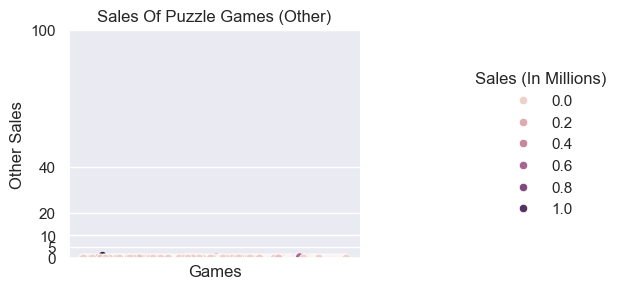

C:\Users\nokmi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


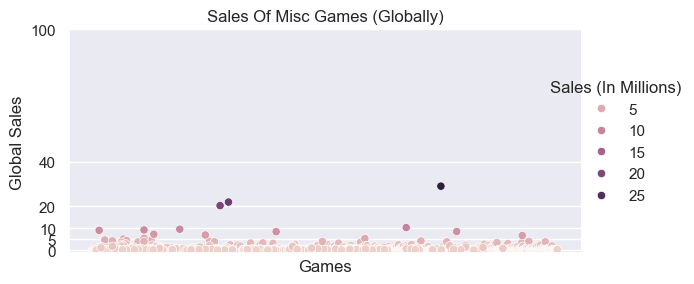

C:\Users\nokmi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


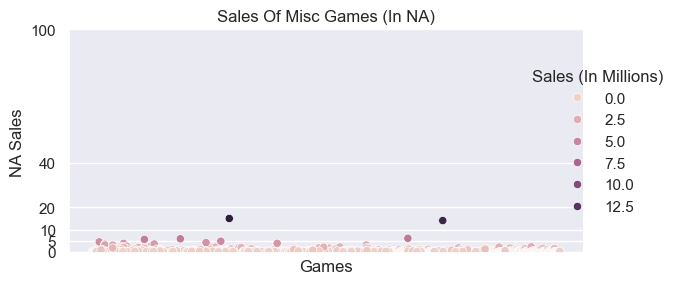

C:\Users\nokmi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


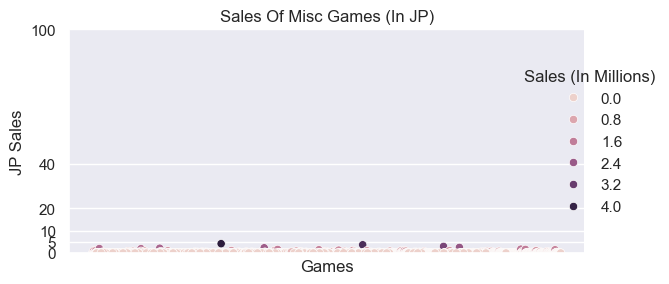

C:\Users\nokmi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


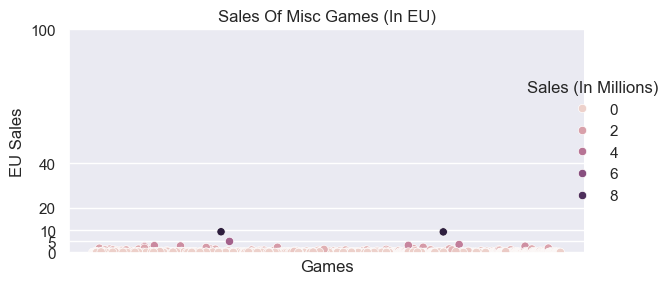

C:\Users\nokmi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


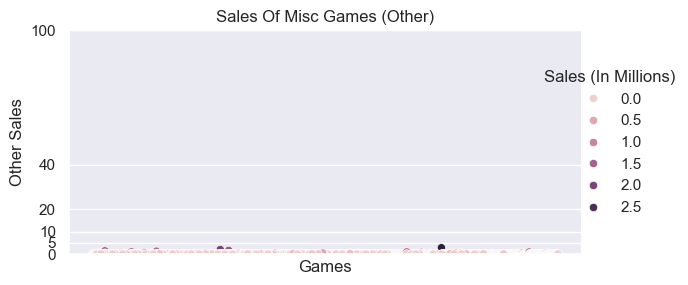

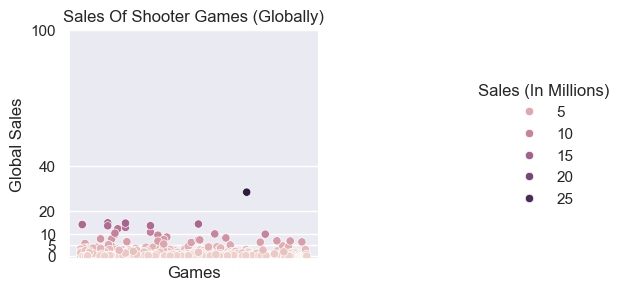

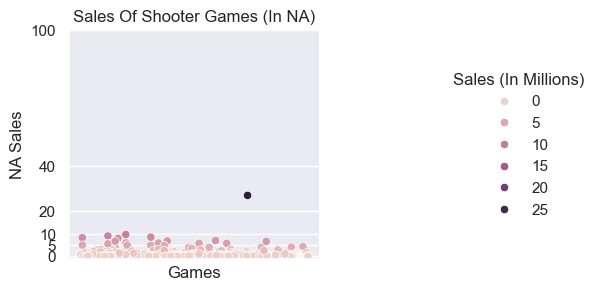

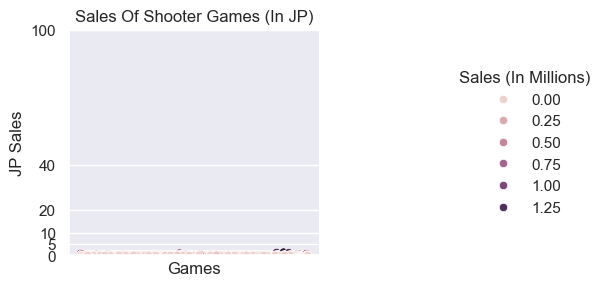

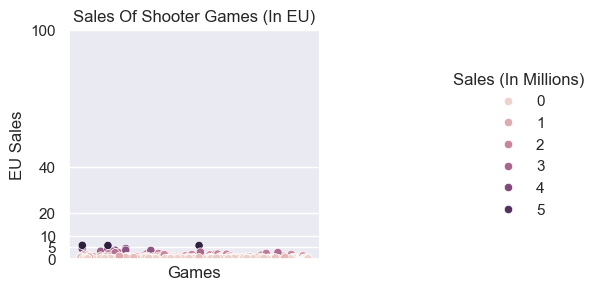

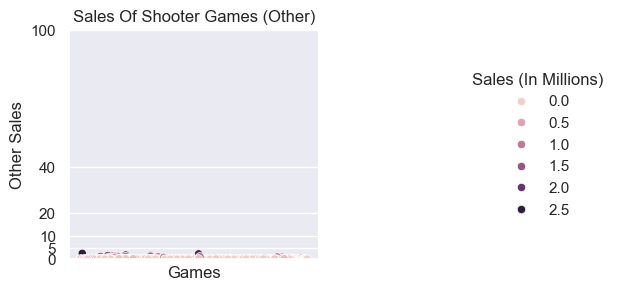

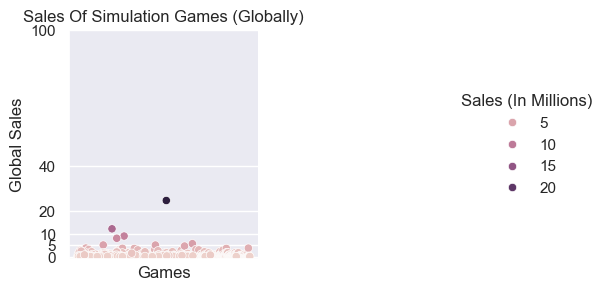

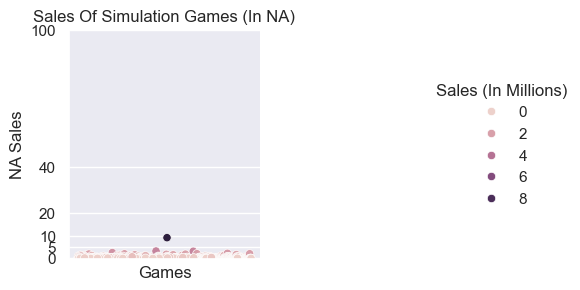

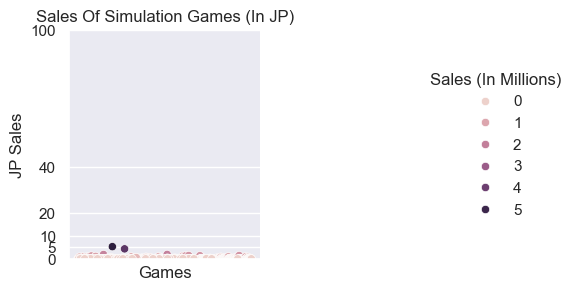

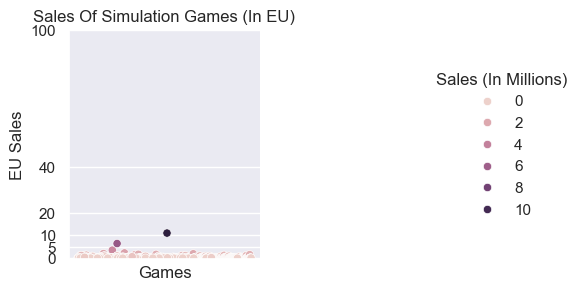

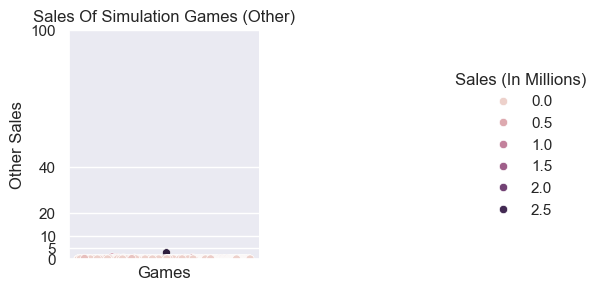

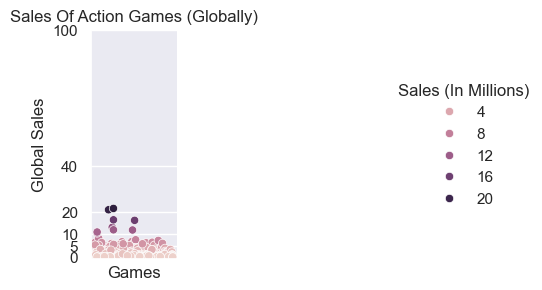

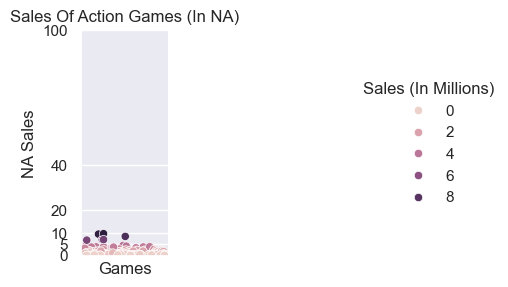

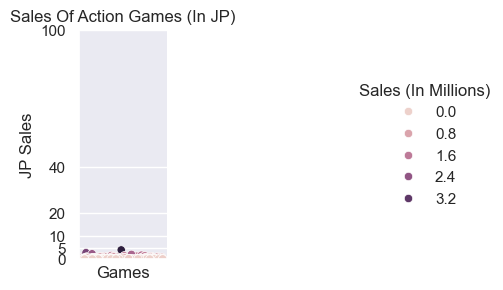

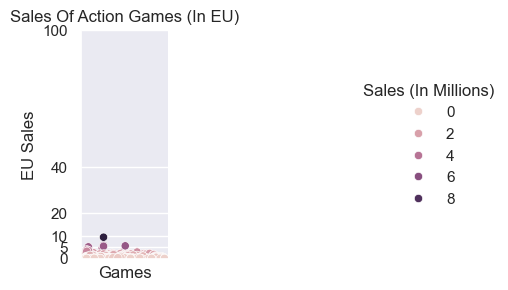

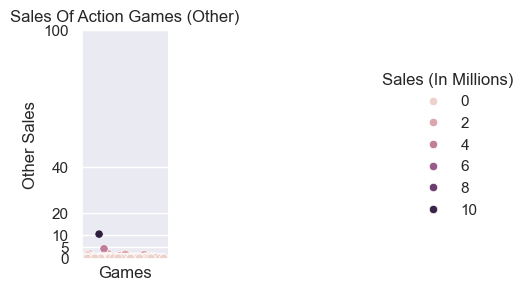

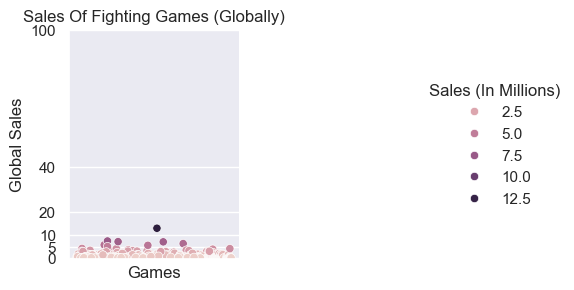

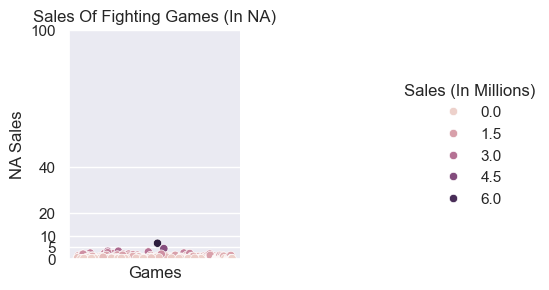

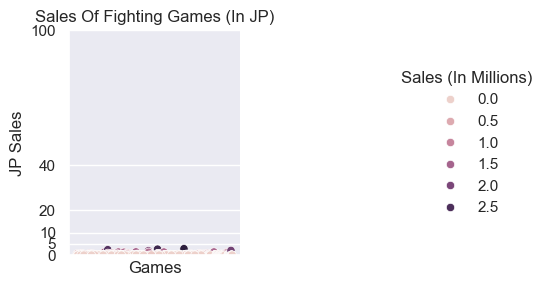

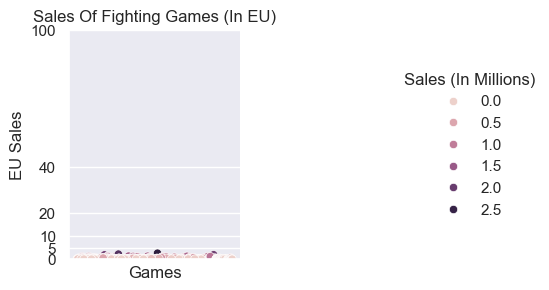

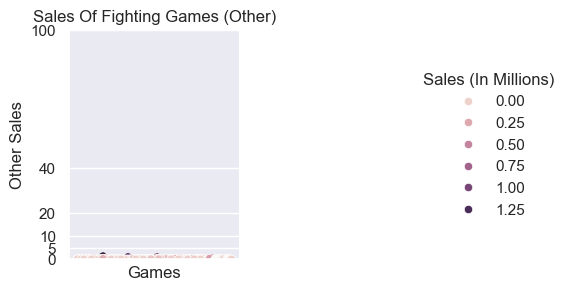

C:\Users\nokmi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


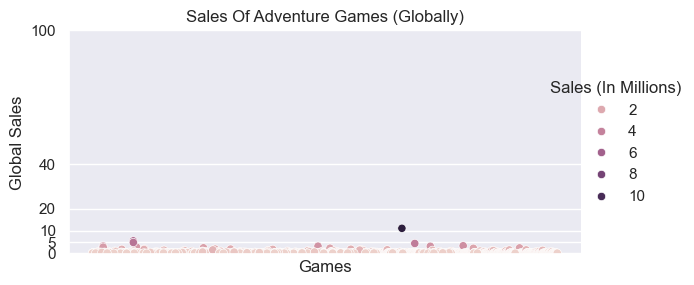

C:\Users\nokmi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


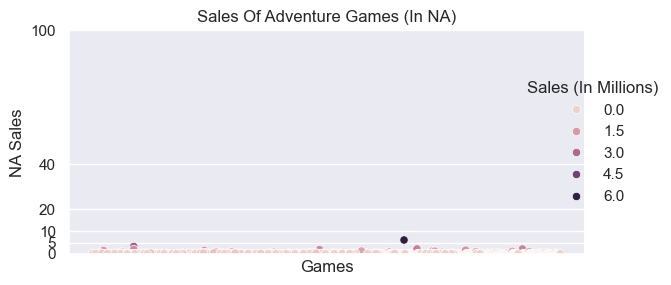

C:\Users\nokmi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


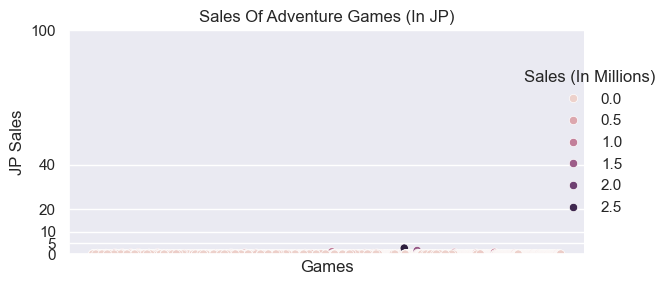

C:\Users\nokmi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


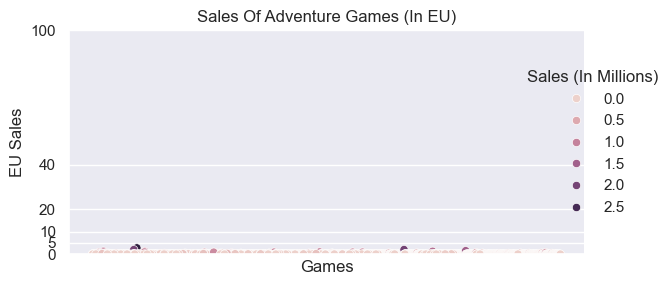

C:\Users\nokmi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


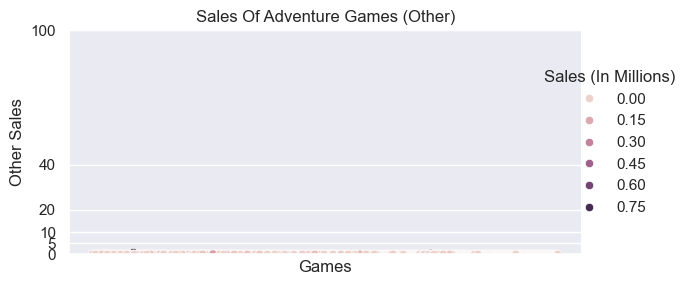

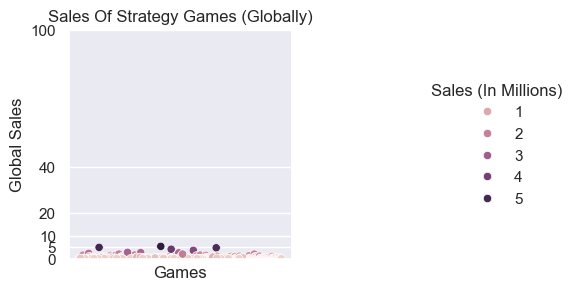

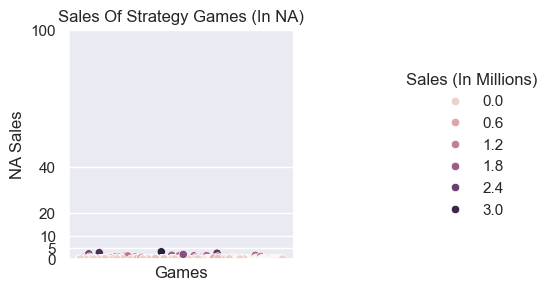

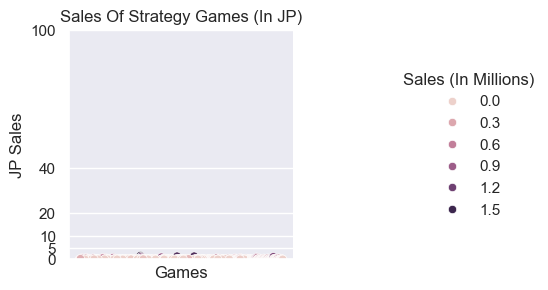

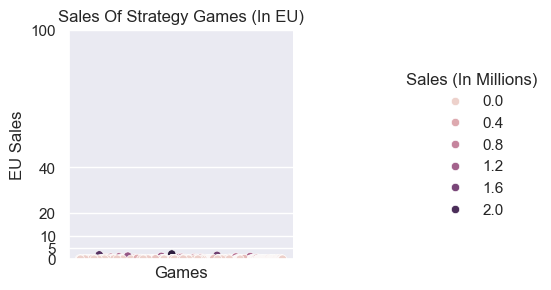

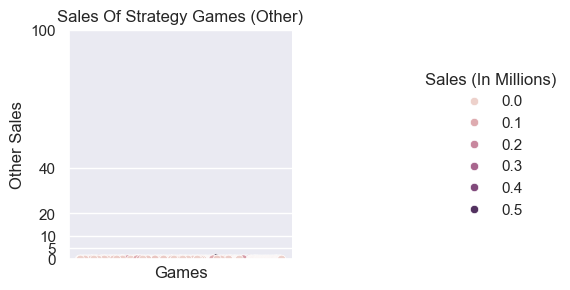

In [4]:
#Cleaning up data to make it easily readable by genre.
uGenres = dfGameSales['genre'].unique()

#Loops through all the genres and prints a pairplot of each sales region
for genres in uGenres:
    STDB = dfGameSales['genre'].isin([genres])
    #print(dfGameSales[STDB])
    rng = np.random.RandomState(0)
    indices = rng.choice(np.arange(len(dfGameSales[STDB])), len(dfGameSales[STDB]), replace=False)
    GenrePlot = sns.pairplot(data = dfGameSales[STDB].iloc[indices], y_vars = 'global_sales', x_vars = 'name',hue='global_sales', height = 3, aspect = 2)
    GenrePlot.set(xticks =[], yticks = [0,5,10,20,40,100])
    GenrePlot._legend.set_title("Sales (In Millions)")
      
    plt.title(f"Sales Of {genres} Games (Globally)")
    plt.xlabel("Games")
    plt.ylabel("Global Sales")
    plt.show()

    GenrePlot = sns.pairplot(data = dfGameSales[STDB].iloc[indices], y_vars = 'na_sales', x_vars = 'name',hue='na_sales', height = 3, aspect = 2)
    GenrePlot.set(xticks =[], yticks = [0,5,10,20,40,100])
    GenrePlot._legend.set_title("Sales (In Millions)")
    plt.xlabel("Games")
    plt.title(f"Sales Of {genres} Games (In NA)")
    plt.ylabel("NA Sales")
    plt.show()

    GenrePlot = sns.pairplot(data = dfGameSales[STDB].iloc[indices], y_vars = 'jp_sales', x_vars = 'name',hue='jp_sales', height = 3, aspect = 2)
    GenrePlot.set(xticks =[], yticks = [0,5,10,20,40,100])
    GenrePlot._legend.set_title("Sales (In Millions)")
    plt.title(f"Sales Of {genres} Games (In JP)")
    plt.xlabel("Games")
    plt.ylabel("JP Sales")
    plt.show()

    GenrePlot = sns.pairplot(data = dfGameSales[STDB].iloc[indices], y_vars = 'eu_sales', x_vars = 'name',hue='eu_sales', height = 3, aspect = 2)
    GenrePlot.set(xticks =[], yticks = [0,5,10,20,40,100])
    GenrePlot._legend.set_title("Sales (In Millions)")
    plt.title(f"Sales Of {genres} Games (In EU)")
    plt.xlabel("Games")
    plt.ylabel("EU Sales")
    plt.show()

    GenrePlot = sns.pairplot(data = dfGameSales[STDB].iloc[indices], y_vars = 'other_sales', x_vars = 'name',hue='other_sales', height = 3, aspect = 2)
    GenrePlot.set(xticks =[], yticks = [0,5,10,20,40,100])
    GenrePlot._legend.set_title("Sales (In Millions)")
    plt.title(f"Sales Of {genres} Games (Other)")
    plt.xlabel("Games")
    plt.ylabel("Other Sales")
    plt.show()


    

        genre    year  global_sales
0      Action  1980.0          0.34
1      Action  1981.0         14.84
2      Action  1982.0          6.52
3      Action  1983.0          2.86
4      Action  1984.0          1.85
..        ...     ...           ...
384  Strategy  2012.0          3.33
385  Strategy  2013.0          6.33
386  Strategy  2014.0          0.99
387  Strategy  2015.0          1.82
388  Strategy  2016.0          0.50

[389 rows x 3 columns]


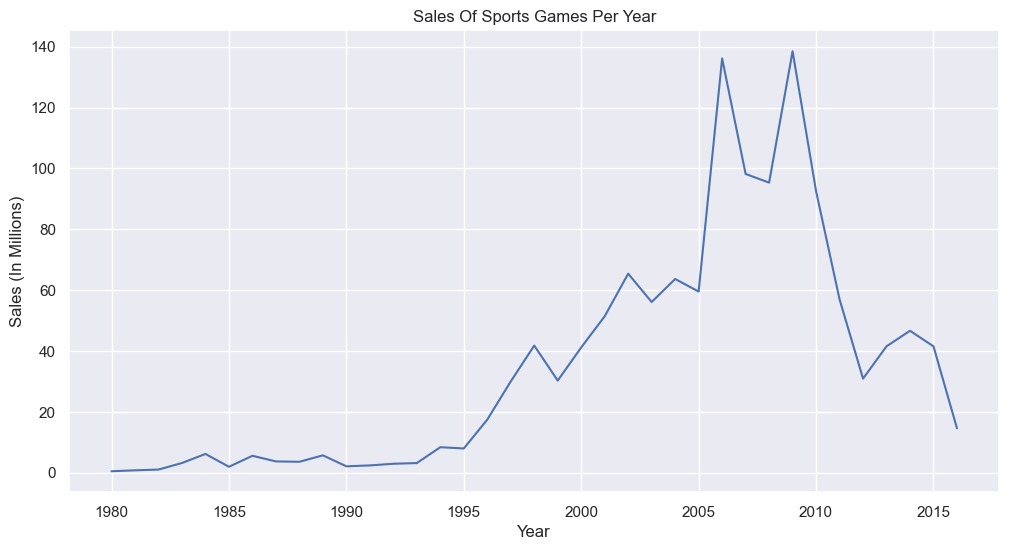

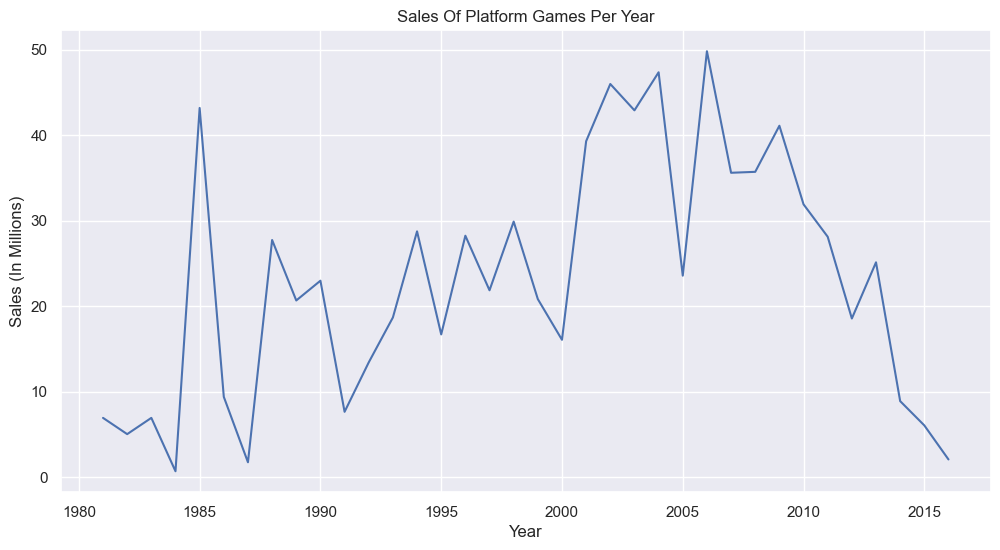

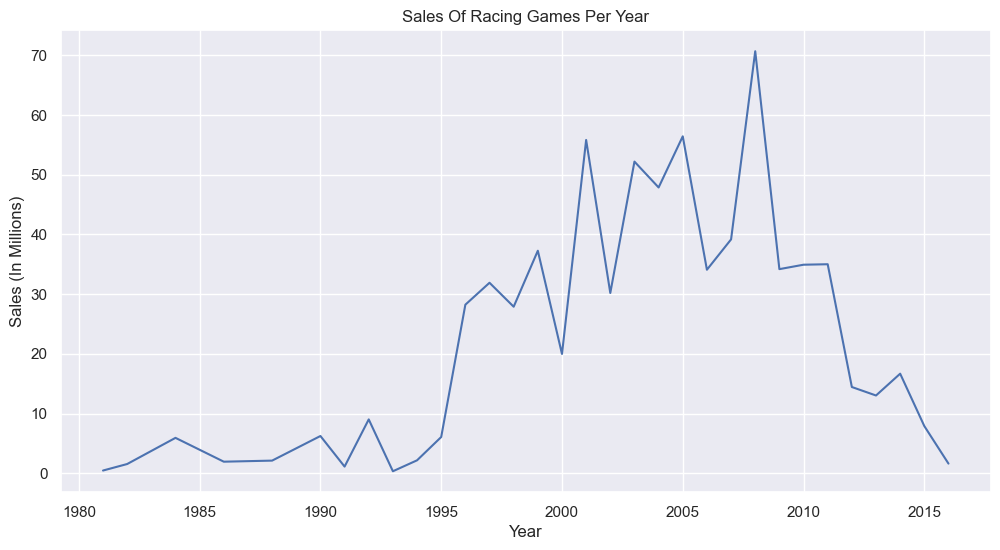

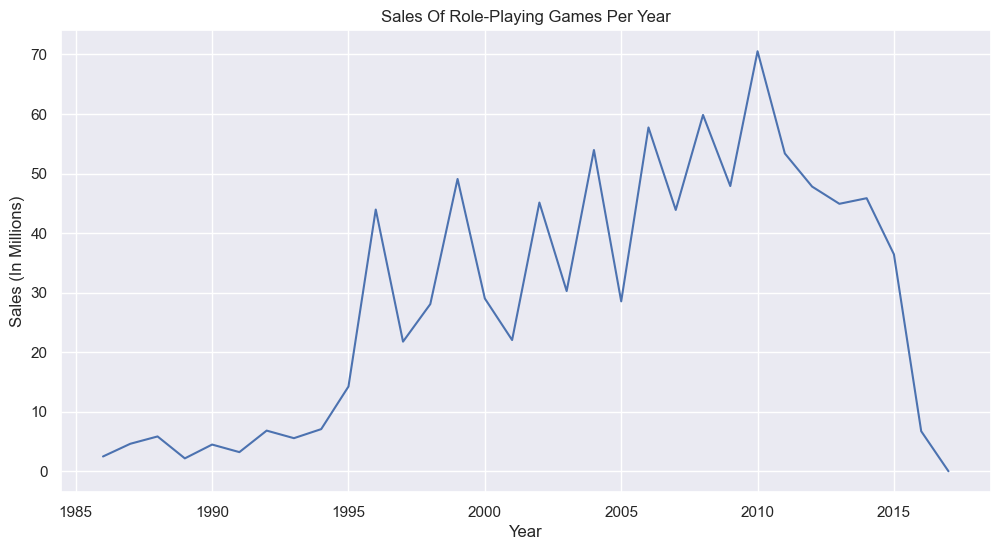

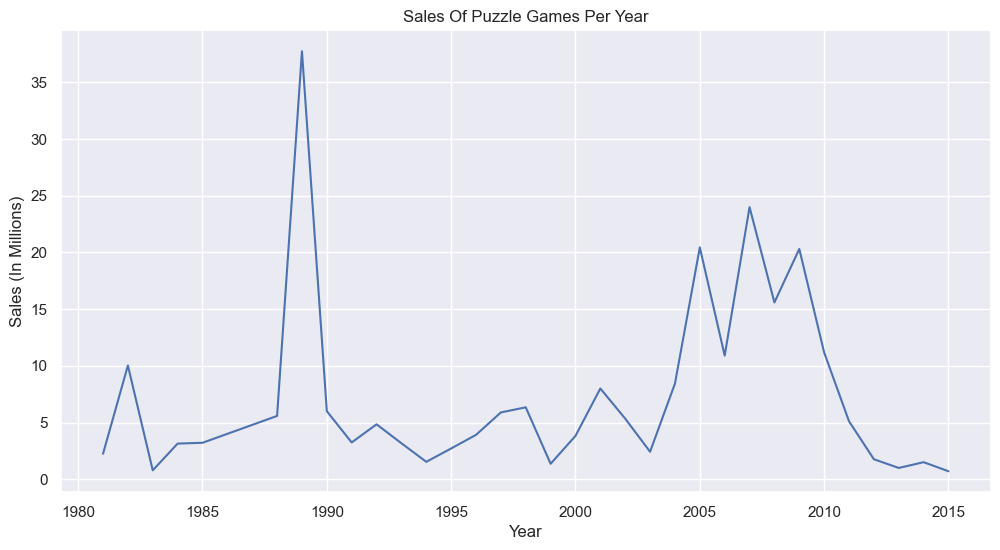

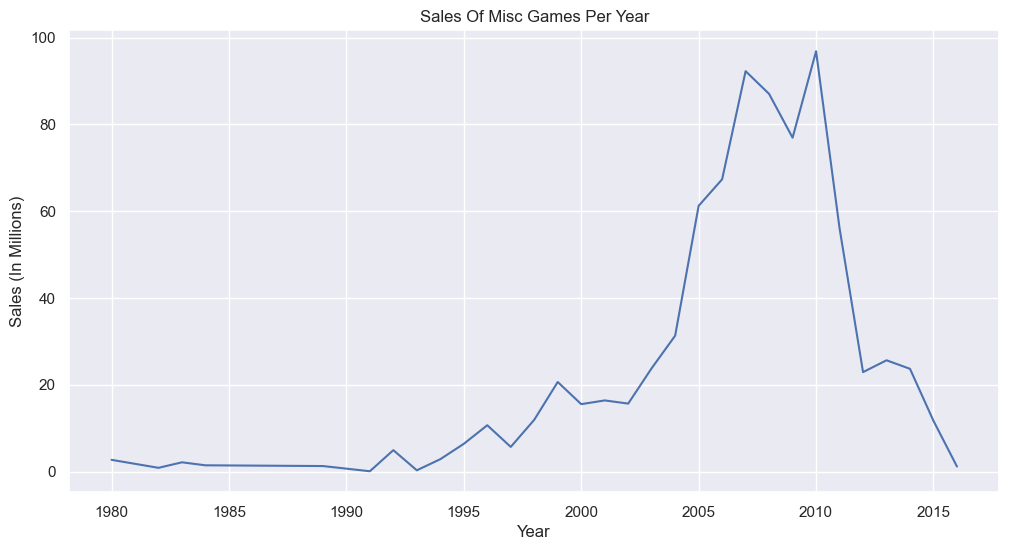

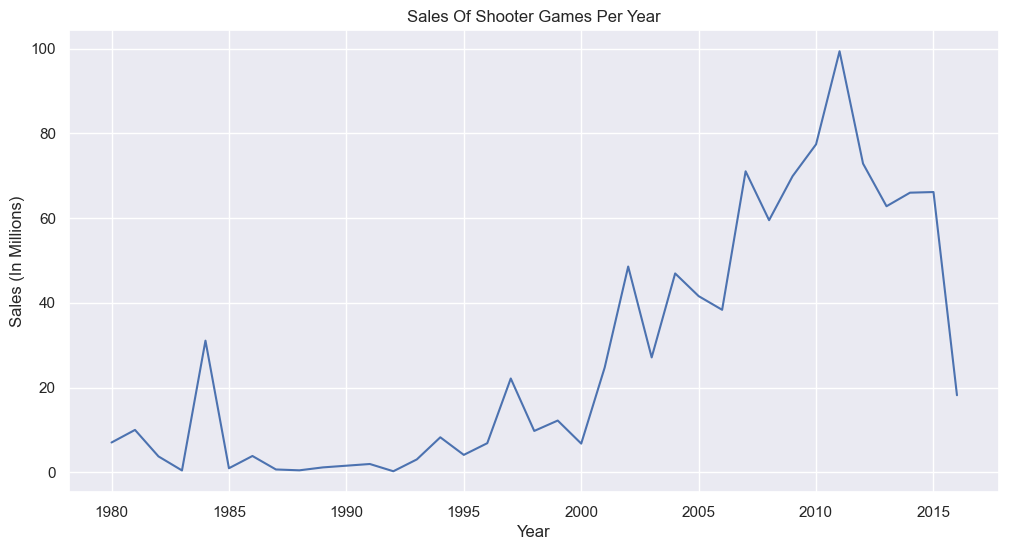

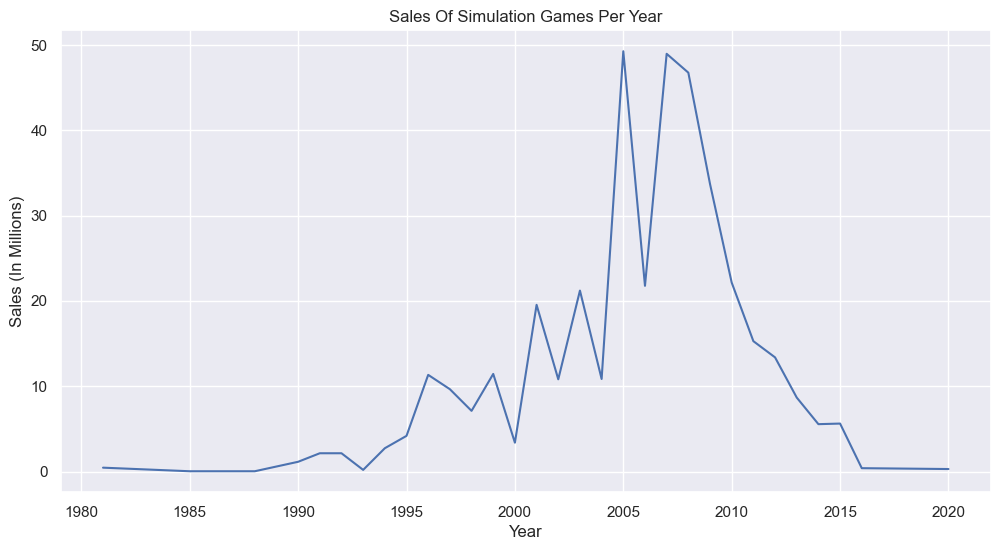

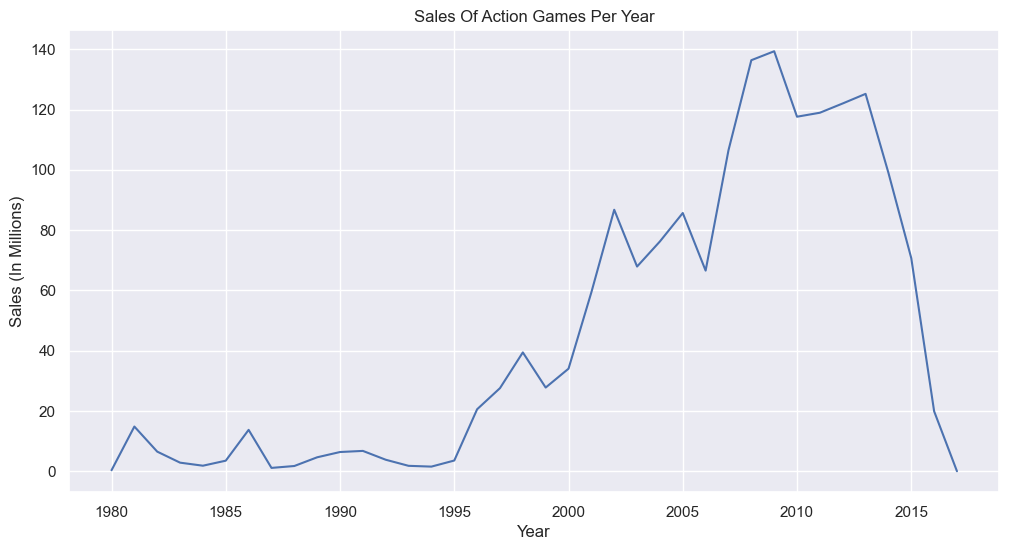

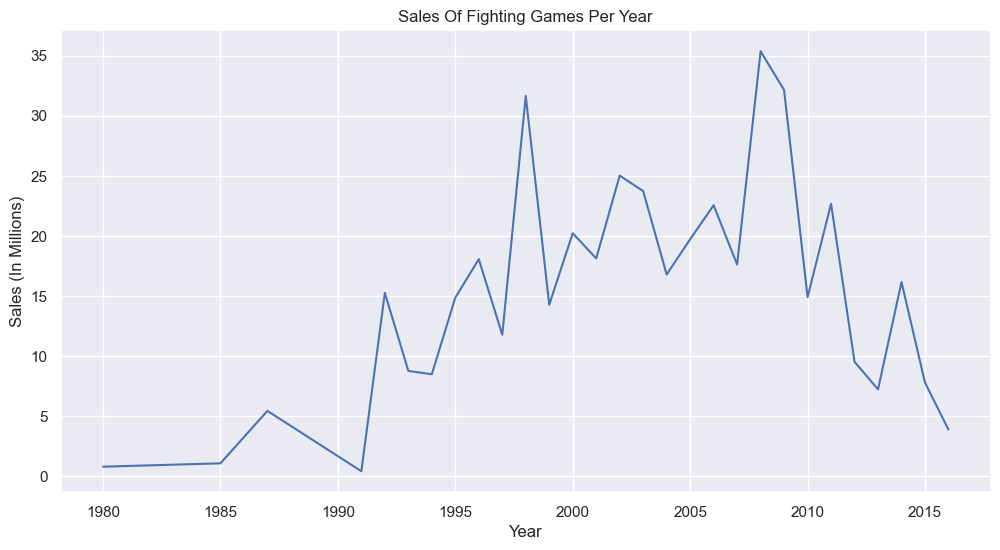

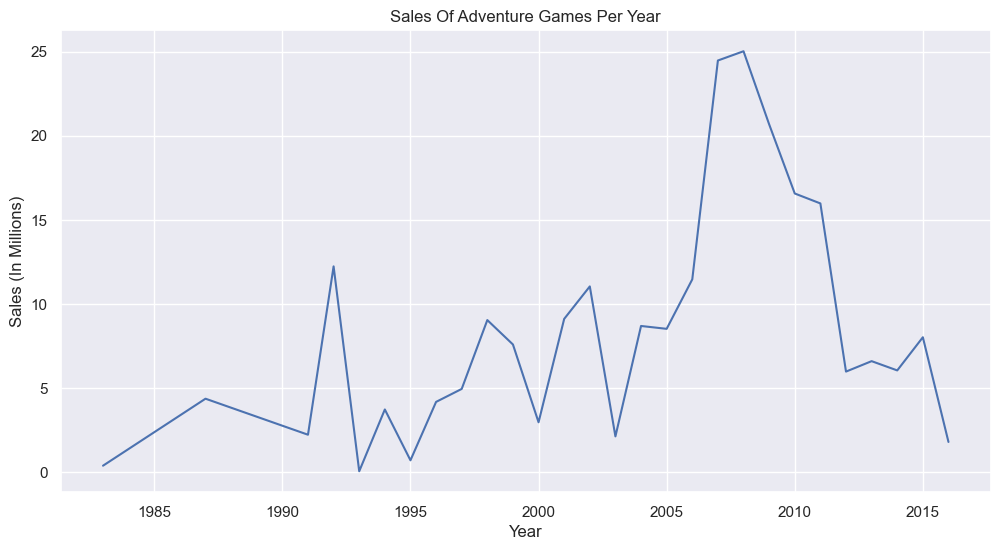

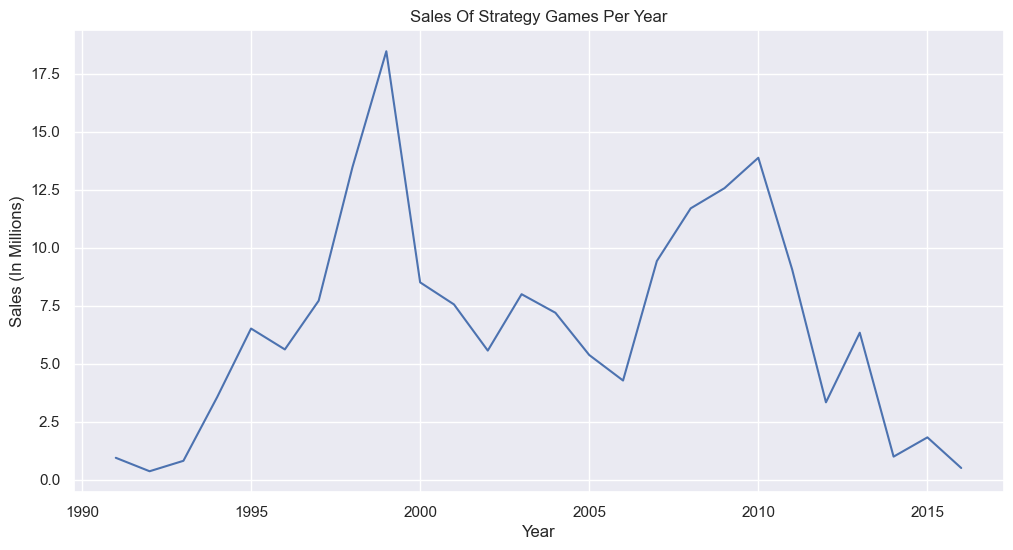

In [5]:
#Showing Sales by Year per Genre
gYearlySales = dfGameSales.groupby(["genre","year"])["global_sales"].sum().reset_index()
print(gYearlySales)
for genres in uGenres:
    STDB = gYearlySales['genre'].isin([genres])

    rng = np.random.RandomState(0)
    indices = rng.choice(np.arange(len(gYearlySales[STDB])), size=len(gYearlySales[STDB]), replace=False)
    GenrePlot = sns.lineplot(data = gYearlySales[STDB].iloc[indices], y = 'global_sales', x = 'year')
    plt.title(f"Sales Of {genres} Games Per Year")
    plt.xlabel("Year")
    plt.ylabel("Sales (In Millions)")
    plt.show()


In [6]:
def get_batches(dLen: int, batch_size: int = 32) -> List[np.ndarray]:
    indices = np.arange(dLen)
    np.random.shuffle(indices)
    batches = []
    for i in range(0,len(indices),batch_size):
        batches.append(indices[i:i+batch_size])
    return batches

In [7]:

def PreprocessedNN() -> Tuple[np.ndarray, ...]:
   #Data Preprocessing.
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = None, None, None, None, None, None
    #Drop Null Values
    Xb = dfGameSales.dropna()
    #print(Xb)
    #Drop unused columns.
    X = Xb.drop(['name','platform','genre','publisher','global_sales','year'], axis=1).values
    #Set Y to the column to predict data of.
    y = Xb['global_sales'].values
    #print(X)
    #print(y)

    #Split data into Training, Testing, and Validation sets.
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)
    
    scale = sklearn.preprocessing.StandardScaler()
    scale.fit(X_trn)
    X_trn = scale.transform(X_trn)
    X_vld = scale.transform(X_vld)
    X_tst = scale.transform(X_tst)
    return X_trn, y_trn.reshape(-1, 1), X_vld, y_vld.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1)
    
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = PreprocessedNN()

In [8]:
#Linear and Tanh Methods
class Linear():
    #This makes is so the activation and derivative functions of both Tanh and Linear do not near "self" as an argument.
    @staticmethod
    def activation(z: np.ndarray) -> np.ndarray:
        return z
        pass
    
    @staticmethod
    def derivative(z: np.ndarray) -> np.ndarray:
        return np.ones(z.shape)
        pass

class Tanh():
    @staticmethod
    def activation(z: np.ndarray) -> np.ndarray:
        return (np.power(np.e,z) - np.power(np.e,-z)) / (np.power(np.e,z) + np.power(np.e,-z))
        pass

    @staticmethod
    def derivative(z: np.ndarray) -> np.ndarray:
        return 1- Tanh.activation(z)**2
        pass


In [9]:
def iWeights( n_input_features: int,  hidden_neurons: int,  output_neurons: int) -> Tuple[np.ndarray, ...]:

    W1, b1, W2, b2 = None, None, None, None
    #Sets the weights between -0.5 and 0.5
    W1 = np.random.uniform(low=-0.5, high=0.5, size=(n_input_features, hidden_neurons))
    b1 = np.ones([1, hidden_neurons])
    
    W2 = np.random.uniform(low=-0.5, high=0.5, size=(hidden_neurons, output_neurons))
    b2 = np.ones([1, output_neurons])
    return W1, b1, W2, b2

def forward( X: np.ndarray,  W1: np.ndarray,  b1: np.ndarray, W2: np.ndarray,  b2: np.ndarray) -> Tuple[np.ndarray, ...]:
    
    Z1, A1, Z2, A2 = None, None, None, None

    Z1 = X @ W1 + b1
    A1 = Tanh.activation(Z1)
    Z2 = A1 @ W2 + b2
    A2 = Linear.activation(Z2)

    return Z1, A1, Z2, A2

In [10]:
def hLayerGrads( X: np.ndarray, y: np.ndarray, W1: np.ndarray, Z1: np.ndarray, A1: np.ndarray, W2: np.ndarray, Z2: np.ndarray, A2: np.ndarray
) -> Tuple[np.ndarray, np.ndarray]:
 
    W1_avg_grad, b1_avg_grad = None, None
    y_hat = A2
    DMSEA2 = y_hat - y
    DA2_Z2 = Linear.derivative(Z2)
    DZ2_A1 = W2
    DA1_Z1 = Tanh.derivative(Z1)
    DZ1_W1 = X

    DZ1_B1 = np.ones([len(y), 1])

    DMSEA1 = (DMSEA2 * DA2_Z2) @ DZ2_A1.T
    DMSEW1 = DZ1_W1.T @ (DMSEA1 * DA1_Z1)
    DMSEB1 = DZ1_B1.T @ (DMSEA1 * DA1_Z1)
    
    W1_avg_grad = DMSEW1 / len(y)
    b1_avg_grad = DMSEB1 / len(y)
    
    return W1_avg_grad, b1_avg_grad

def oLayerGrads( X: np.ndarray, y: np.ndarray, W1: np.ndarray, Z1: np.ndarray, A1: np.ndarray, W2: np.ndarray, Z2: np.ndarray,A2: np.ndarray
) -> Tuple[np.ndarray, np.ndarray]:
    W2_avg_grad, b2_avg_grad = None, None
    y_hat = A2
    dMse_A2 = y_hat-y
    
    dA2_Z2 = Linear.derivative(Z2)
    dZ2_W2 = A1
    dZ2_b2 = np.ones([len(y), 1])

    dMseZ2 = dMse_A2 * dA2_Z2
    dMseW2 = dZ2_W2.T @ dMseZ2
    dMse_b2 = dZ2_b2.T @  dMseZ2

    W2_avg_grad = dMseW2 / len(y)
    b2_avg_grad = dMse_b2 / len(y) 
    
    return W2_avg_grad, b2_avg_grad


In [11]:
class NeuralNetwork():
    def __init__(self, hidden_neurons: int, output_neurons: int, alpha: float,  batch_size: int, epochs: int = 1, seed: int = 0):

        self.hidden_neurons = hidden_neurons
        self.output_neurons = output_neurons
        self.batch_size = batch_size
        self.alpha = alpha
        self.epochs = epochs
        self.seed = seed
        self.W1, self.b1 = None, None
        self.W2, self.b2 = None, None
        self.trn_error = None
        self.vld_error = None

    def fit( self, X: np.ndarray, y: np.ndarray, X_vld: np.ndarray = None, y_vld:np.ndarray = None): 
        np.random.seed(self.seed)
        self.trn_error = []
        self.vld_error = []
        
        yhvld = 0
        self.W1, self.b1, self.W2, self.b2 = iWeights(n_input_features = X.shape[1],
        hidden_neurons = self.hidden_neurons, output_neurons = self.output_neurons)

        #Loop through epochs
        for ep in range(self.epochs):
            #Get batches for learning
            batches = get_batches(len(X),self.batch_size)
            #Loop through above batches
            for bat in batches:
                #This psudocode from the HW for this still gives me nightmares
                Z1, A1, Z2, A2 = forward(X = X[bat], W1 = self.W1, b1 = self.b1, W2 = self.W2, b2 = self.b2)
                W1grad, b1grad = hLayerGrads(X = X[bat], y = y[bat], W1 = self.W1, Z1 = Z1, A1 = A1, W2 = self.W2, Z2 = Z2,A2 = A2)
                
                W2grad, b2grad = oLayerGrads(X = X[bat], y = y[bat], W1 = self.W1, Z1 = Z1, A1 = A1, W2 = self.W2, Z2 = Z2, A2 = A2)
                self.W2 = self.W2 - self.alpha * W2grad
                self.W1 = self.W1 - self.alpha * W1grad
                self.b1 = self.b1 - self.alpha * b1grad
                self.b2 = self.b2 - self.alpha * b2grad

            #Make a prediction, append the mse to trn_error,
            y_hat = self.predict(X)
            self.trn_error.append(np.sqrt(mse(y,y_hat)))
            #If it Vld isn't None, predict X_Vld and add its mse to Vld_error.
            if(X_vld is not None and y_vld is not None):
                yhVld = self.predict(X_vld)
                self.vld_error.append(np.sqrt(mse(yhVld, y_vld)))

        return self

    
    def predict(self, X: np.ndarray):
        #Calculate and return A2 as predcition
        Z1, A1, Z2, A2 = forward(X=X, W1=self.W1, b1=self.b1, W2=self.W2, b2=self.b2)
        return A2.reshape(-1,1)
        pass

In [15]:
nn = NeuralNetwork(hidden_neurons=5, output_neurons=1,batch_size=200,alpha=0.005,epochs=300,seed=536)
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = PreprocessedNN()
nn.fit(X_trn,y_trn,X_vld,y_vld)
print(f"Training Accuracy: {rmse(y_trn,nn.predict(X_trn))}")
print(f"Testing Accuracy: {rmse(y_tst, nn.predict(X_tst))}")


Training Accuracy: 0.4452720738521868
Testing Accuracy: 1.2960599754800521


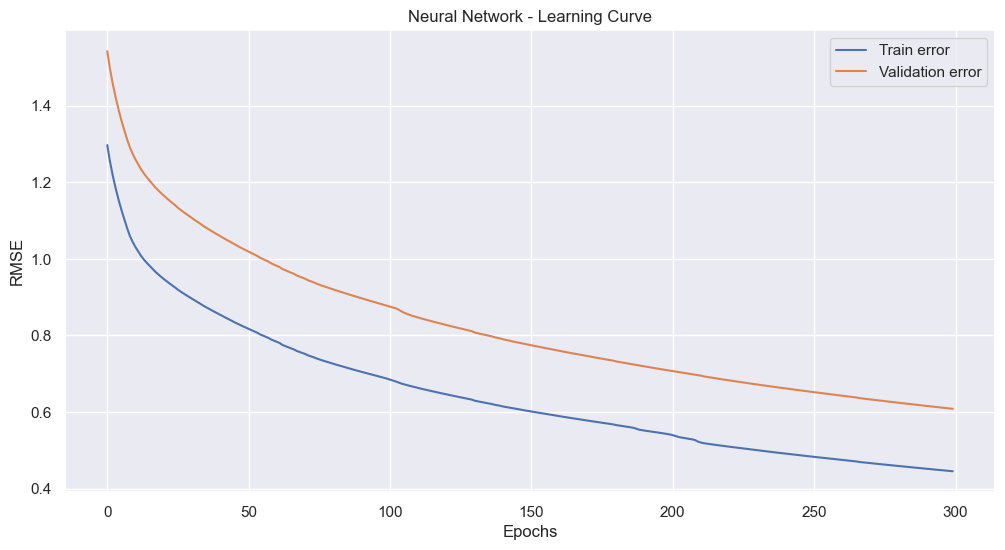

In [17]:
#Graphing The Learning Curve
plt.plot(nn.trn_error, label='Train error')
plt.plot(nn.vld_error, label='Validation error')
plt.title("Neural Network - Learning Curve")
plt.ylabel("RMSE")
plt.xlabel("Epochs")
plt.legend()
plt.show()


In [19]:
def pFeatures(X: np.ndarray, degree: int) -> Tuple[np.ndarray]:
    polyItem = np.empty((3,2))
    X_poly = X.copy()
    
    for i in range(1,degree + 1):
        polyItem = X.copy()
        rows, columns = polyItem.shape
        for j in range(rows):
            for n in range(columns):
                polyItem[j, n] = polyItem[j,n] ** i
        if(i != 1):
            X_poly = np.hstack((X_poly, polyItem))
    
    return X_poly

In [21]:
def PreprocessRidge(degree: int)  -> Tuple[np.ndarray]:
    #Sets X and Y to proper parts of the dataset
    X = dfGameSales.drop(['name','platform','genre','publisher','global_sales','year'], axis=1).values
    y = dfGameSales['global_sales'].values
    
    X_poly  = pFeatures(X,degree)
    
    
    #Splits up datat into Training/Validation/Tessting variables
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.7, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.7, random_state=42)
    
    #Standardize the data, fitting it to X_trn.
    sScaler = sklearn.preprocessing.StandardScaler()
    sScaler.fit(X_trn)
    X_trn = sScaler.transform(X_trn)
    X_vld = sScaler.transform(X_vld)
    X_tst = sScaler.transform(X_tst)
    
    #Add bias to training, validation, and trsting data.
    bias = np.ones((X_trn.shape[0],1))
    X_trn = np.hstack((bias,X_trn))

    bias = np.ones((X_vld.shape[0],1))
    X_vld = np.hstack((bias,X_vld))

    bias = np.ones((X_tst.shape[0],1))
    X_tst = np.hstack((bias,X_tst))

    #return split data and reshape y to proper shape (-1,1)
    return X_trn, y_trn.reshape(-1, 1), X_vld, y_vld.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1)

In [23]:
class RidgeOLS():
    def __init__(self, lamb: float):
        self.lamb = lamb
        self.w = None
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> object:
        #Creates new identity matrix
        nX = np.eye(N = X.shape[1], M = X.shape[1])
        #Sets upper right of matrix to 0.
        nX[(0,0)] = 0
        #Set Weights
        self.w = ( (np.linalg.inv(X.T@X + self.lamb * nX)) @ X.T @  y)
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        return X@self.w

Testing Predictions: 0.007990367252252823
Training Predictions: 0.007433801430072267


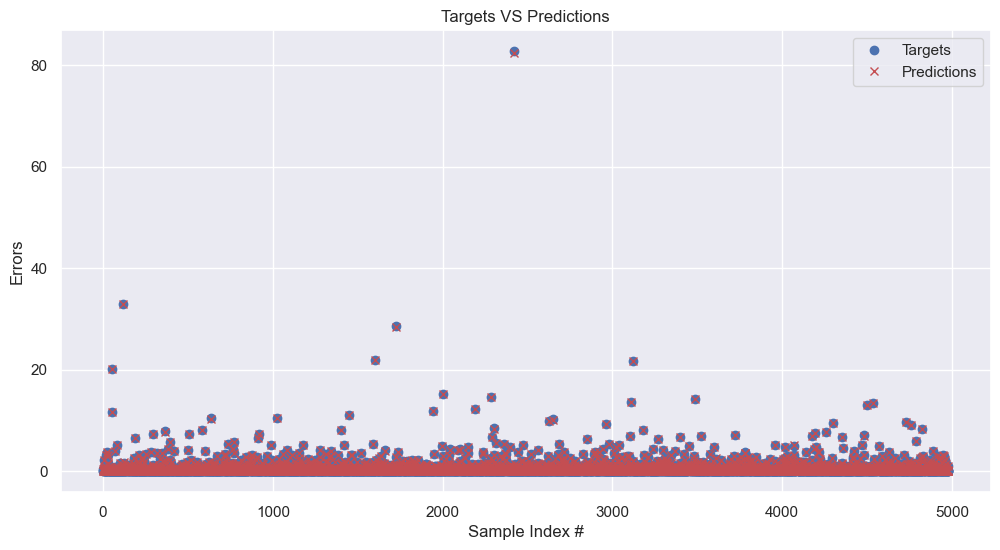

In [29]:
#Set degree to 2, doesn't need to be too high.
X_trn, y_trn, NotUsed, NotUsed2, X_tst, y_tst = PreprocessRidge(degree = 2)

#Set Lambda to 5
rOLS = RidgeOLS(50)
rOLS.fit(X_trn,y_trn)
print(f"Testing Predictions: {rmse(y_tst,rOLS.predict(X_tst))}")
print(f"Training Predictions: {rmse(y_trn,rOLS.predict(X_trn))}")
y_hat_tst = rOLS.predict(X_tst)


    
plt.plot(y_tst, 'ob', label='Targets')
plt.plot(y_hat_tst, 'xr', label='Predictions')
plt.xlabel("Sample Index #")
plt.ylabel("Errors")
plt.title("Targets VS Predictions")
plt.legend()
plt.legend(bbox_to_anchor=(1.00, 1.00))
plt.show()